# Homework 5: This or Physics Hack Day

Physics 177, Spring 2017 (Prof. Tanedo)  
Due: Tuesday, May 16  

*Your Name*

**Important**: This homework is optional **if** you participate in Physics Hack Day:  
http://theory.ucr.edu/PhysicsHackDay/

If you do so, please delete all of the cells below and replace it with a link to the Physics Hack Day GitHub repository to which you contributed. 


## Problem 1: Double Pendulum

In this problem, you will extend the simple pendulum in <a href="https://github.com/Physics177-2017/Homework04">Homework 4</a> to a <a href="https://en.wikipedia.org/wiki/Double_pendulum">double pendulum</a>.

<img src="hw5pendulum.png">  
Image from <a href="https://commons.wikimedia.org/wiki/File:Double-Pendulum.svg">Wikimedia Commons</a>

Assume no forces other than gravity. Do not assume the small angle approximation. 

Plot the trajectory of the double pendulum for a few different initial conditions. Your goal is to reproduce the cool-looking trajectories in the  <a href="https://en.wikipedia.org/wiki/Double_pendulum">Wikipedia article</a>, for example:

<img src="hw5_doublepic.jpg">

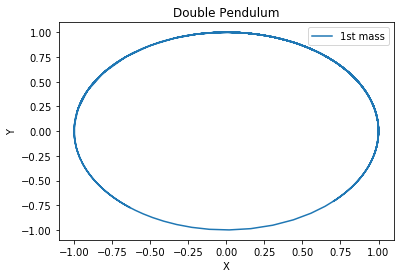

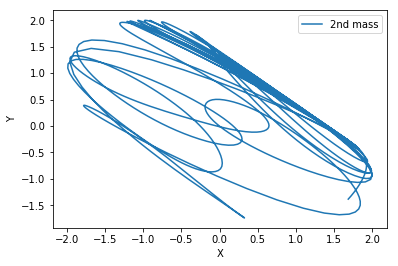

In [16]:
%matplotlib inline
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt


# CONSTANTS AND PARAMETERS
g= 9.8
m = 1.0 #mass is 1
l = 1.0 #Both strings will be the same length

theta0 = 1.0 #Initial radian displacement
phi0 = 1.0 #2nd Mass radian displacement
omega0 = 0.0 #Initial angular velocity
w0 = 0.0 #2nd initial velocity

dt = 0.01
t_final = 10.0

#omega
def f(theta, phi, omega, w, t):
    return ((omega**2 * sin(2 * (theta - phi))) + (2 * w**2 * sin(theta - phi)) + ((g/l) * (sin(2 * theta - phi)) + 3 * sin(theta))) / (3 - cos(2 * (theta - phi)))

#phi
def h(theta, phi, omega, w, t):
    return ((4 * omega**2 * sin(2 * (theta - phi))) + (w**2 * sin(2 * (theta - phi))) + (2 * (g/l) * ((sin(2 * theta - phi)) - sin(phi)))) / (3 - cos(2 * (theta - phi)))

def a(theta, phi, omega, w, t):
    return omega

def b(theta, phi, omega, w, t):
    return w

tpoints = np.arange(0, t_final, dt)

def integrate():
    theta_points = []
    phi_points = []
    omega_points = []
    w_points = []
    
    theta = theta0
    phi = phi0
    omega = omega0
    w = w0
    
    for t in tpoints:
        
        theta_points.append(theta)
        phi_points.append(phi)
        omega_points.append(omega)
        w_points.append(w)

        k1 = dt * a(theta, phi, omega, w, t)
        k2 = dt * a(theta + 0.5 * k1, phi, omega, w, t)
        
        b1 = dt * b(theta, phi, omega, w, t)
        b2 = dt * b(theta, phi + 0.5 * b1, omega, w, t)
        
        c1 = dt * f(theta, phi, omega, w, t)
        c2 = dt * f(theta, phi, omega + 0.5 * c1, w, t)
        
        d1 = dt * h(theta, phi, omega, w, t)
        d2 = dt * h(theta, phi, omega, w + 0.5 * d1, t)
        
        theta += k2
        phi += b2
        omega += c2
        w += d2
        
    tt = np.array(tpoints)
    thetas = np.array(theta_points)
    phis = np.array(phi_points)
    omegas = np.array(omega_points)
    ws = np.array(w_points)
    
    return tt, thetas, phis, omegas, ws

times, thetaf, phif, omegaf, wf = integrate()
x1 = l * sin(thetaf)
y1 = -l * cos(thetaf)

x2 = l * sin(phif) + x1
y2 = - l * sin(phif) + y1

plt.plot(x1, y1, label='1st mass')
plt.title("Double Pendulum")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
plt.plot(x2, y2, label = '2nd mass')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


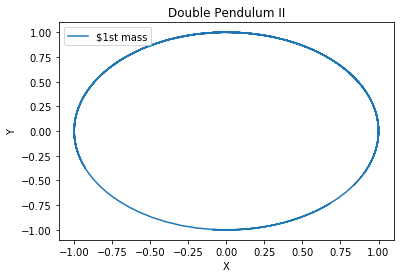

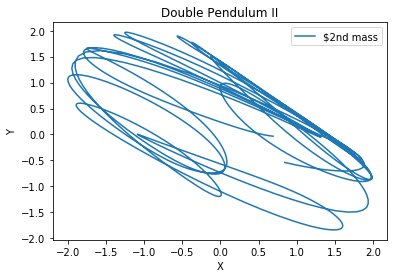

In [17]:
theta0 = 1.0 #Initial radian displacement
phi0 = 0.0 #2nd Mass radian displacement
omega0 = 0.0 #Initial angular velocity
w0 = 0.0 #2nd initial velocity

times, thetaf, phif, omegaf, wf = integrate()
x1 = l * sin(thetaf)
y1 = -l * cos(thetaf)

x2 = l * sin(phif) + x1
y2 = - l * sin(phif) + y1

plt.plot(x1, y1, label='$1st mass')
plt.title("Double Pendulum II")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

plt.plot(x2, y2, label = '$2nd mass')
plt.title("Double Pendulum II")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

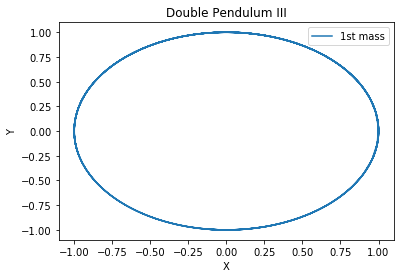

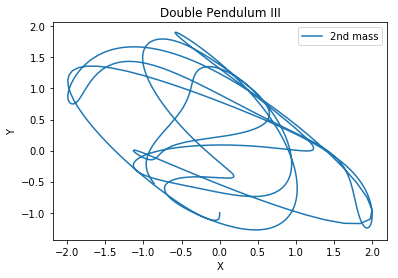

In [18]:
cond = np.array([0.0, 0.0, 1.0, -1.0])
theta0 = 0.0 #Initial radian displacement
phi0 = 0.0 #2nd Mass radian displacement
omega0 = -1.0 #Initial angular velocity
w0 = 1.0 #2nd initial velocity

times, thetaf, phif, omegaf, wf = integrate()
x1 = l * sin(thetaf)
y1 = -l * cos(thetaf)

x2 = l * sin(phif) + x1
y2 = - l * sin(phif) + y1

plt.plot(x1, y1, label='1st mass')
plt.title("Double Pendulum III")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

plt.plot(x2, y2, label = '2nd mass')
plt.title("Double Pendulum III")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Problem 1, extra credit:

I think the double pendulum trajectories are really neat. They're a very simple system with surprisingly complex behavior. (Maybe it's just surprising to me?) For extra credit (or for inspiration for Physics Hack Day), consider some of the following:

* Make an animation of the double pendulum trajectory. You can simultaneously animate the trajectories of both weights, see <a href="https://en.wikipedia.org/wiki/Double_pendulum#/media/File:Trajektorie_eines_Doppelpendels.gif">this  example</a>. 
* In your animation above, can you also do the "gradual fading" of the older trajectory points that is demonstrated in the example?
* Here's something really cool: can you **sonify** the trajectory? Map the *velocity* of the mass to a pitch and then play the pitch as the pendulum moves. In this way, you model the *Doppler shift* of a buzzer attached to the double pendulum. You can find an example of the implementation of the `scipy` sound library <a href="https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html">here</a>... which is itself a fantastic example of a Jupyter notebook in Nobel-prize-worthy research.
* Triple pendulum?! (If you need inspiration: https://www.youtube.com/watch?v=OQSNhk5ICTI)

<IPython.core.display.Javascript object>


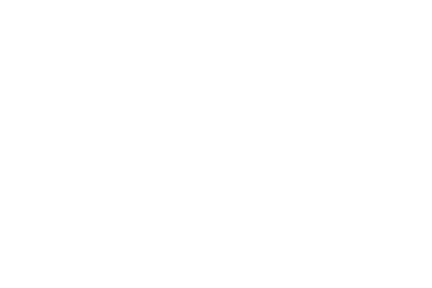

<IPython.core.display.Javascript object>


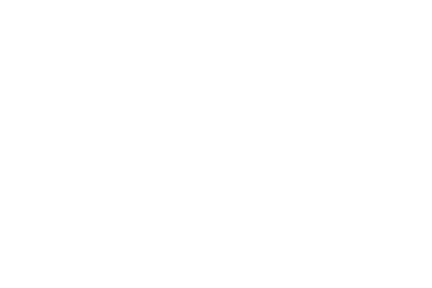

In [19]:
%matplotlib notebook

import matplotlib.animation as animation
from IPython.display import HTML
from scipy.integrate import odeint

theta0 = 1.0 #Initial radian displacement
phi0 = 1.0 #2nd Mass radian displacement
omega0 = 0.0 #Initial angular velocity
w0 = 0.0 #2nd initial velocity

#Function to call equations of motion
def eqn_motion(cond, t):
    DF = np.zeros_like(cond)
    
    dif_ang = cond[0] - cond[1]
    
    DF[0] = cond[2]
    
    DF[1] = ((cond[2]**2 * sin(2 * dif_ang)) + (2 * cond[3]**2 * sin(dif_ang)) + ((g/l) * (sin(dif_ang - cond[1])) + 3 * sin(cond[0]))) / (3 - cos(2 * dif_ang))
    
    DF[2] = cond[3]
    
    #DF[3] = ((4 * cond[2]**2 * sin(2 * dif_ang)) + (cond[3]**2 * sin(2 * dif_ang)) + (2 * (g/l) * ((sin(dif_ang + cond[0])) - sin(cond[1])))) / (3 - cos(2 * dif_ang))
    
    
    return DF

#Time array creation. From 0 to 10.0
tt = np.arange(0, t_final, dt)

#initial conditions
cond = np.array([theta0, phi0, omega0, w0]) #theta, phi, and their respective dots

#integration
z = odeint(eqn_motion, cond, tt)

#Coordinates for graphing. r1 is 1st mass, r2 is the extension
x1 = l * sin(z[:, 0])
y1 = -l * cos(z[:, 0])

x2 = l * sin(z[:, 1]) + x1
y2 = - l * sin(z[:, 1]) + y1


fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2,2), ylim=(-2,2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]
    
    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i * dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(z)), interval = 25, blit=True, init_func=init)

plt.show()

## Problem 2: Poisson Equation

The Poisson equation in two dimension is:

$$\displaystyle \partial_x^2 \phi(x,y) + \partial_y^2 \phi(x,y) = -\rho(x,y)$$

We have picked units where $\varepsilon_0 = 1$ and $\rho$ is the charge density.

This is similar to the <a href="https://github.com/Physics177-2017/Lec11-PDE/blob/master/Lecture%2011%20Preview.ipynb">Lecture 11</a> demo, except that now there are source charges. 

Numerically solve the Poisson equation following two dimensional system (Newman Example 9.2):

<img src="HW5_NewmanFig9.4.png">

This is a 2D with size 100 cm by 100 cm. There are smaller 20 cm by 20 cm squares. The one on the upper right has charge density $\rho = +1/\text{cm}^2$ and the one on the lower left has charge density $\rho = -1/\text{cm}^2$. The boundaries of the large square are set to zero potential. 

Solve for the potential, $\phi$, everywhere in the large square. Plot the potential. I leave it to you to pick a discretization (step size) that is sufficiently fast while also demonstrating the correct behavior. 

Hint: before you do anything, you should guess what the expected result should be.

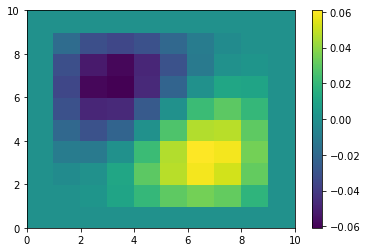

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#constants
M = 10 #grid squares
V = 1.0
i = 0
j = 0
target = 1e-2
x = 0
w = 9

n = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
m = [0.0,0.0,0.0,0.0,0.0,0.0,V,V,0.0,0.0]
c = [0.0,0.0,-V,-V,0.0,0.0,0.0,0.0,0.0,0.0]

s = []

s = [n,n,m,m,n,n,c,c,n,n]

grape = np.array(s)

phiprime = np.zeros([w + 1, w + 1], float)

delta = 1.0
while delta > target:
    for i in range(w + 1):
        for j in range(w + 1):
            if (i in range(6,7) and j in range(3,4)) or (i in range(3,4) and j in range(6,7)):
                phiprime[i,j] = grape[i,j]
            if i == 0 or j == 0 or i == w or j == w:
                phiprime[i,j] = grape[i,j]
            else:
                ter = grape[i + 1, j] + grape[i - 1, j] + grape[i, j + 1] + grape[i, j - 1]
                phiprime[i,j] = (ter) / 4.0
                
    delta = np.max(np.abs(grape-phiprime))
    
    grape, phiprime = phiprime, grape
    
#print(grape)
#print(phiprime)

xx, yy = np.meshgrid(np.arange(w+2), np.arange(w+2))
plt.pcolormesh(xx,yy,phiprime)
plt.colorbar()
plt.show()